..\dataset\rice_leaf_diseases
40
40
..\dataset\rice_leaf_diseases\Leaf smut\DSC_0293.JPG
[[[225 232 241]
  [225 232 241]
  [224 231 240]
  ...
  [228 233 242]
  [228 233 242]
  [230 232 242]]

 [[225 232 241]
  [224 231 240]
  [224 231 240]
  ...
  [228 233 242]
  [229 234 243]
  [230 232 242]]

 [[226 231 240]
  [226 231 240]
  [226 231 240]
  ...
  [228 233 242]
  [229 234 243]
  [228 233 242]]

 ...

 [[224 227 241]
  [224 227 241]
  [224 228 239]
  ...
  [222 228 239]
  [223 229 240]
  [222 228 239]]

 [[225 228 242]
  [223 229 242]
  [225 229 240]
  ...
  [222 228 239]
  [223 229 240]
  [223 229 240]]

 [[224 230 241]
  [220 229 239]
  [222 228 239]
  ...
  [221 227 238]
  [223 229 240]
  [224 230 241]]]
[[[225 232 241]
  [225 232 241]
  [224 231 240]
  ...
  [228 233 242]
  [228 233 242]
  [230 232 242]]

 [[225 232 241]
  [224 231 240]
  [224 231 240]
  ...
  [228 233 242]
  [229 234 243]
  [230 232 242]]

 [[226 231 240]
  [226 231 240]
  [226 231 240]
  ...
  [228 233 242]
  [

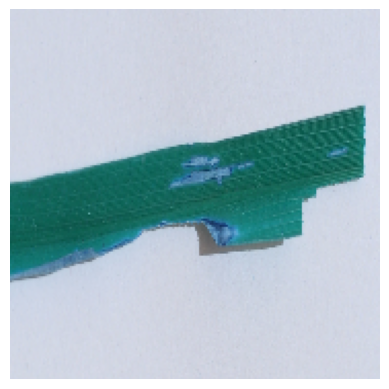

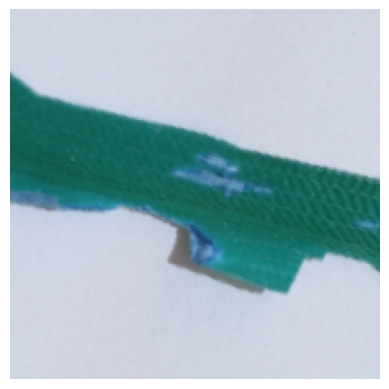

Epoch 1/40
3/3 [==============================] - 7s 1s/step - loss: 4.0273 - accuracy: 0.3556
Epoch 2/40
3/3 [==============================] - 3s 860ms/step - loss: 1.3317 - accuracy: 0.4556
Epoch 3/40
3/3 [==============================] - 3s 939ms/step - loss: 1.1424 - accuracy: 0.3222
Epoch 4/40
3/3 [==============================] - 3s 1s/step - loss: 1.1097 - accuracy: 0.3556
Epoch 5/40
3/3 [==============================] - 3s 1s/step - loss: 1.1124 - accuracy: 0.3111
Epoch 6/40
3/3 [==============================] - 3s 865ms/step - loss: 1.0959 - accuracy: 0.3556
Epoch 7/40
3/3 [==============================] - 3s 861ms/step - loss: 1.0766 - accuracy: 0.4556
Epoch 8/40
3/3 [==============================] - 3s 870ms/step - loss: 1.0723 - accuracy: 0.4556
Epoch 9/40
3/3 [==============================] - 3s 1s/step - loss: 1.0564 - accuracy: 0.4111
Epoch 10/40
3/3 [==============================] - 3s 1s/step - loss: 1.0439 - accuracy: 0.4444
Epoch 11/40
3/3 [=================

[0.302682101726532, 0.8999999761581421]

In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.model_selection import train_test_split
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Setting dataset path
data_dir = '../dataset/rice_leaf_diseases'
data_dir = pathlib.Path(data_dir)
print(data_dir)

list(data_dir.glob("*DSC*.jpg"))

bacteria = list(data_dir.glob("Bacterial leaf blight/*"))
print(len(bacteria))

PIL.Image.open(str(bacteria[0])).show()

brown = list(data_dir.glob("Brown spot/*"))
print(len(brown))

dict = {"bacteria": list(data_dir.glob("Bacterial leaf blight/*")),
        "brown": list(data_dir.glob("Brown spot/*")),
        "smut": list(data_dir.glob("Leaf smut/*"))}

labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2,

}

print(str(dict["smut"][0]))

img = cv2.imread(str((dict["smut"][0])))
print(img)

cv2.resize(img, (180, 180)).shape
print(img)

X, y = [], []

for name, images in dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        X.append(resized_img)
        y.append(labels_dict[name])

print(y[:5])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(len(X_test))

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

num_classes = 3
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=15)

model.evaluate(X_test_scaled, y_test)

predictions = model.predict(X_test_scaled)
predictions

score = tf.nn.softmax(predictions[0])
np.argmax(score)

y_test[0]

data_augmentation = keras.Sequential(
    [

        layers.experimental.preprocessing.RandomZoom(0.2),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomFlip("horizontal")
    ]
)

plt.axis('off')
plt.imshow(X[0])
plt.show()

plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))
plt.show()

num_classes = 3

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=40)

model.evaluate(X_test_scaled, y_test)


In [14]:
print('jitu')


jitu
